# Summary
* Purpose: Compute resolution functions for AgBiSe2 CNCS dataset.
* Procedure:
  - Simulate beam
  - Prepare sample
  - Simulate resolution
 

# Tools

In [1]:
pwd

u'/SNS/users/lj7/notebooks/.rk-work/jnrk-analysis-mcvine-unstable'

** Modify the workdir !!! **

In [2]:
workdir = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1/"

In [3]:
mkdir -p {workdir}

In [4]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1


In [5]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np, os, glob
import histogram.hdf as hh, histogram as H

In [6]:
!which mcvine

/SNS/software/miniconda2/envs/mcvine-unstable/bin/mcvine


In [7]:
import mcvine.cli

In [8]:
from mcvine_workflow.singlextal.resolution import use_res_comps

In [9]:
# use_res_comps

# Beam

** NOTE: You can skip this section if there is existing beam simulation that you can reuse. Just make a symbolic link **

In [10]:
mkdir -p beam

In [11]:
cd {workdir}/beam/

/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1/beam


** Options for the beam simulation **

In [12]:
!mcvine instruments cncs beam --help-properties

properties of 'cncs_beam':
    E=<float>: desired incident beam energy. unit: meV
        default value: 20
        current value: 20.0, from {default}
    dumpconfiguration=<bool>: If set, dump configuration to a pml file
        default value: 0
        current value: False, from {default}
    dumpconfiguration-output=<str>: Output file path of dumped configuration file (pml)
        default value: ''
        current value: '', from {default}
    f1=<float>: Chopper freq 1. unit: Hz
        default value: 60
        current value: 60.0, from {default}
    f2=<float>: Chopper freq 2. unit: Hz
        default value: 60
        current value: 60.0, from {default}
    f3=<float>: Chopper freq 3. unit: Hz
        default value: 60
        current value: 60.0, from {default}
    f41=<float>: Chopper freq 41. unit: Hz
        default value: 300
        current value: 300.0, from {default}
    f42=<float>: Chopper freq 42. unit: Hz
        default value: 300
        current value: 300.0, fro

In [15]:
# Ei=15, highflux mode

In [32]:
%%time
!mcvine instruments cncs beam -E=15 -f1=60 -f2=60 -f3=60 -f41=300 -f42=300 -ncount=1e10 -fluxmode=9.0 -nodes=20 >log.sim

/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/AbstractComponent.py:40: UserWarning: In NeutronToStorage: Deprecated. should use self.simulation_context.overwrite_datafiles
  warnings.warn(msg)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/AbstractComponent.py:40: UserWarning: In NeutronToStorage: Deprecated. should use self.simulation_context.overwrite_datafiles
  warnings.warn(msg)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/AbstractComponent.py:40: UserWarning: In NeutronToStorage: Deprecated. should use self.simulation_context.overwrite_datafiles
  warnings.warn(msg)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/AbstractComponent.py:40: UserWarning: In NeutronToStorage: Deprecated. should use self.simulation_context.overwrite_datafiles
  warnings.warn(msg)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/AbstractComponent.py:40: UserWarning: In NeutronToStorage: Deprecated. should use self.simulation_context.overwr

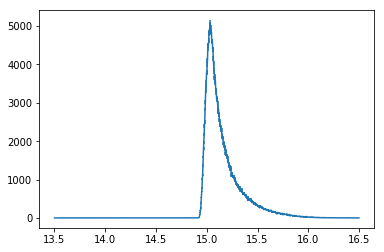

In [13]:
H.plot(hh.load('out/ienergy.h5'))

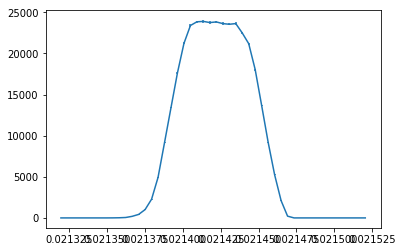

In [14]:
H.plot(hh.load('out/itof.h5')[(0.02132, 0.02152)])

In [15]:
ls out

ienergy.h5  ix_divx.h5  ix_y.h5     iy_divy.h5  props.json
itof.h5     ix_divy.h5  iy_divx.h5  neutrons    rank0-step0/


In [16]:
cat out/props.json

{'flux': '351896.249009 counts per 34kJ pulse', 'tof fwhm': '59.9398936458 microsecond', 'average energy': '15.1557796266 meV'}

In [17]:
!mcvine-neutron-storage-count-neutrons out/neutrons

685818


# Sample

In [18]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1


In [19]:
%%file sample.yaml
name: AgBiSe2
chemical_formula: AgBiSe2
lattice: 
 constants: 5.835, 5.835, 5.835, 90, 90, 90
 basis_vectors:
  - 5.835, 0, 0
  - 0, 5.835, 0
  - 0, 0, 5.835
excitations:
 - type: DGSresolution
orientation:
 u: 0, 0, 1
 v: 1, 1, 0
shape: cylinder radius="1.1*cm" height="2*cm"
temperature: 100*K

Overwriting sample.yaml


In [20]:
sampleyml = "{workdir}/sample.yaml".format(**locals())

In [21]:
print sampleyml

/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1//sample.yaml


# CNCS Instrument

In [22]:
beam = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1/beam/"
psi_axis = -74, 50, 1
instrument = use_res_comps.instrument(
    name = 'CNCS',
    detsys_radius = "3.5*meter",
    L_m2s = "36.264*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_res_comps.pixel(
    radius = "0.5*inch",
    height = "2.*meter/128",
    pressure = "6*atm",
    )

# Try one point

In [23]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/resolution-try1


** Define projection direction and starting point **

In [24]:
hkl_projection = np.array([-1,-1,0])

In [25]:
hkl0 = np.array([0,0,2])
hkl0

array([0, 0, 2])

** Define point of interest **

In [26]:
E = 5
x = 0.5

In [27]:
hkl = hkl0 + hkl_projection*x

In [28]:
hkl

array([-0.5, -0.5,  2. ])

** Run simulation setup **

In [29]:
rm -rf test/

In [30]:
use_res_comps.setup(
    'test',
    sampleyml, beam, E, hkl, hkl_projection,
    psi_axis, instrument, pixel)

15.1557796266 125.075700477
Ei=15.1557796266, t0=125.075700477
Computed:
* psi=-32.386935884 degree
* Q=[ 1.41078189 -1.79653325  0.        ]
* hkl2Qmat=[[ 0.40784239  0.64298078 -0.76141953]
 [ 0.40784239  0.64298078  0.76141953]
 [ 0.90931214 -0.57677624  0.        ]]
* ki=2.70446581426
* vectors ki=[ 2.70446581  0.          0.        ], kf=[ 1.29368393  1.79653325  0.        ]
These two numbers should be very close:
5.0
5.0
  Ei=15.1557796266, Ef=10.1557796266
* Ef=10.1557796266
* pixel positon=[ 2.04525394  2.84023526  0.        ]
* pixel_position=[ 2.04525394  2.84023526  0.        ]
t_m2s=0.0214218792754, t_s2p=0.00251095696987, t_m2p=0.0239328362453


/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())


In [31]:
ls test

run.py  sample/


In [32]:
#! cat test/run.py

In [33]:
#! cat test/sample/AgBiSe2-scatterer.xml

** Run simulation. This will take a couple minutes **

In [34]:
!cd test && python run.py

weight:  1.0
0-99999: ........../SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")

100000-199999: ..........
200000-299999: ..........
300000-399999: ..........
400000-499999: ..........
500000-599999: ..........
Done.


In [35]:
# !cat test/log.run

In [36]:
ls -tl test

total 24672
-rw-r--r-- 1 lj7 users    27194 Mar  6 23:51 res.h5
-rw-r--r-- 1 lj7 users  3856080 Mar  6 23:51 probs.npy
-rw-r--r-- 1 lj7 users  3856080 Mar  6 23:51 dEs.npy
-rw-r--r-- 1 lj7 users  3856080 Mar  6 23:51 dxs.npy
-rw-r--r-- 1 lj7 users 11568080 Mar  6 23:51 dhkls.npy
-rw-r--r-- 1 lj7 users      986 Mar  6 23:46 run.py
drwxr-xr-x 2 lj7 users       93 Mar  6 23:46 sample/


plot z in (0.0, 0.877375124728)


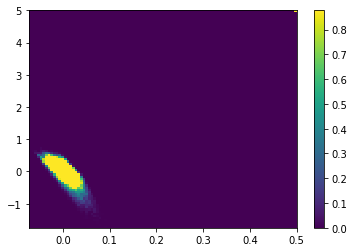

In [38]:
H.plot(hh.load("test/res.h5"))